# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Verändrung der Wildtier Population auf der Welt seit 1970"
### 1.2 Fragestellung:
- "Wie hat sich die Wildtierpopulation in Afrika seit 1970 verändert, im Vergleich zu Asien und Pacific, Europa und Central Asien, Lateinamerika und Karibik und den Süsswasssergebieten?"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [ ]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [1]:
pip install pandas requests

Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests

url = 'https://ourworldindata.org/grapher/global-living-planet-index.csv?v=1&csvType=full&useColumnShortNames=true'  
response = requests.get(url)

with open('global-living-planet-index.csv', 'wb') as file:
    file.write(response.content)

In [13]:
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/global-living-planet-index.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/global-living-planet-index.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [28]:
import pandas as pd

df = pd.read_csv('global-living-planet-index.csv')
print(df.head())

   Entity Code  Year   lpi_final    ci_high      ci_low
0  Africa  NaN  1970  100.000000  100.00000  100.000000
1  Africa  NaN  1971   94.004613  103.67786   86.478470
2  Africa  NaN  1972   89.996994  105.99841   77.636576
3  Africa  NaN  1973   89.674807  109.67456   74.525344
4  Africa  NaN  1974   85.613140  109.10656   67.872155


In [24]:
print(df.describe())

              Year   lpi_final     ci_high      ci_low
count   357.000000  357.000000  357.000000  357.000000
mean   1995.000000   62.852547   80.038822   50.874899
std      14.740261   30.835893   32.728130   29.994732
min    1970.000000    5.377315    9.517395    2.832950
25%    1982.000000   37.214458   55.269647   23.687129
50%    1995.000000   63.837220   87.592334   48.693627
75%    2008.000000   89.896840  105.411270   76.082350
max    2020.000000  128.223780  147.943120  110.602660


In [25]:
print(df.isnull().sum())

Entity       0
Year         0
lpi_final    0
ci_high      0
ci_low       0
dtype: int64


In [22]:
df = df.drop(columns=['Code'])

In [27]:
df = df.fillna(0)

In [29]:
import matplotlib.pyplot as plt

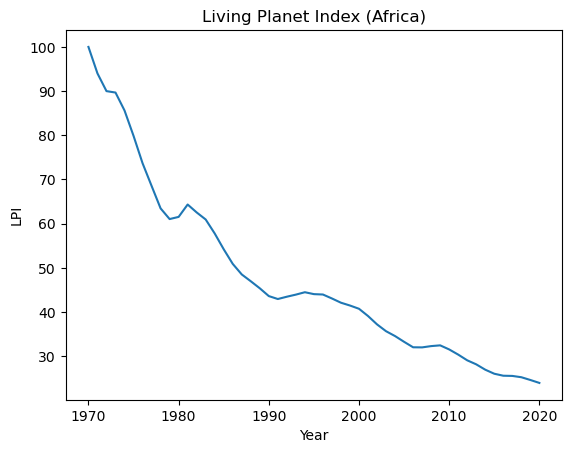

In [30]:
df_africa = df[df['Entity'] == 'Africa']
plt.plot(df_africa['Year'], df_africa['lpi_final'])
plt.title('Living Planet Index (Africa)')
plt.xlabel('Year')
plt.ylabel('LPI')
plt.show()

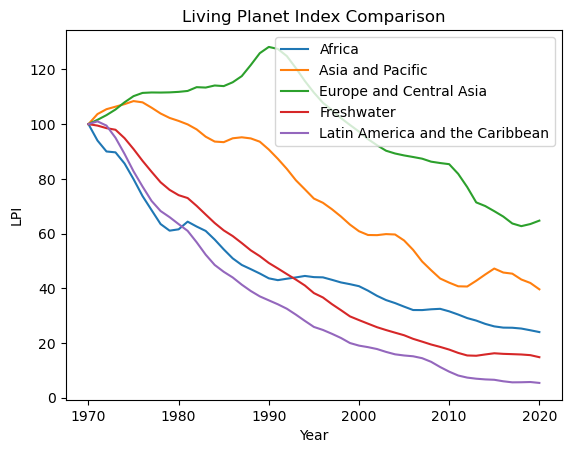

In [31]:
regions = df['Entity'].unique()[:5]
for region in regions:
    region_data = df[df['Entity'] == region]
    plt.plot(region_data['Year'], region_data['lpi_final'], label=region)

plt.title('Living Planet Index Comparison')
plt.xlabel('Year')
plt.ylabel('LPI')
plt.legend()
plt.show()

In [32]:
df.to_csv('cleaned_living_planet_index.csv', index=False)

In [33]:
wide_df = df.pivot(index='Year', columns='Entity', values='lpi_final')
print(wide_df.head())

Entity      Africa  Asia and Pacific  Europe and Central Asia  Freshwater  \
Year                                                                        
1970    100.000000         100.00000                100.00000  100.000000   
1971     94.004613         103.67014                101.56176   99.466056   
1972     89.996994         105.45609                103.28828   98.527170   
1973     89.674807         106.37546                105.34041   97.939116   
1974     85.613140         107.30608                107.97343   94.870490   

Entity  Latin America and the Caribbean  North America       World  
Year                                                                
1970                         100.000000     100.000000  100.000000  
1971                         101.007160      99.518985   99.406844  
1972                          99.456760      97.919780   98.142850  
1973                          95.006640      95.731320   96.616770  
1974                          89.129627      9

## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     357 non-null    object 
 1   Code       51 non-null     object 
 2   Year       357 non-null    int64  
 3   lpi_final  357 non-null    float64
 4   ci_high    357 non-null    float64
 5   ci_low     357 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 16.9+ KB
None


In [38]:
print(df.head())

   Entity Code  Year   lpi_final    ci_high      ci_low
0  Africa  NaN  1970  100.000000  100.00000  100.000000
1  Africa  NaN  1971   94.004613  103.67786   86.478470
2  Africa  NaN  1972   89.996994  105.99841   77.636576
3  Africa  NaN  1973   89.674807  109.67456   74.525344
4  Africa  NaN  1974   85.613140  109.10656   67.872155


In [39]:
print(df.dtypes)

Entity        object
Code          object
Year           int64
lpi_final    float64
ci_high      float64
ci_low       float64
dtype: object


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [40]:
print("Diskrete Variablen (unique Werte):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} Klassen")

Diskrete Variablen (unique Werte):
Entity: 7 Klassen
Code: 1 Klassen


In [41]:
print("\nKontinuierliche Variablen (numerisch):")
print(df.select_dtypes(include=['float64', 'int64']).columns)


Kontinuierliche Variablen (numerisch):
Index(['Year', 'lpi_final', 'ci_high', 'ci_low'], dtype='object')


In [42]:
print(f"Gesamte Anzahl der Datenpunkte: {len(df)}")

Gesamte Anzahl der Datenpunkte: 357


In [43]:
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())


Fehlende Werte pro Spalte:
Entity         0
Code         306
Year           0
lpi_final      0
ci_high        0
ci_low         0
dtype: int64


In [44]:
print("\nAnzahl der Datenpunkte pro Klasse in 'Entity':")
print(df['Entity'].value_counts())


Anzahl der Datenpunkte pro Klasse in 'Entity':
Entity
Africa                             51
Asia and Pacific                   51
Europe and Central Asia            51
Freshwater                         51
Latin America and the Caribbean    51
North America                      51
World                              51
Name: count, dtype: int64


In [45]:
import matplotlib.pyplot as plt

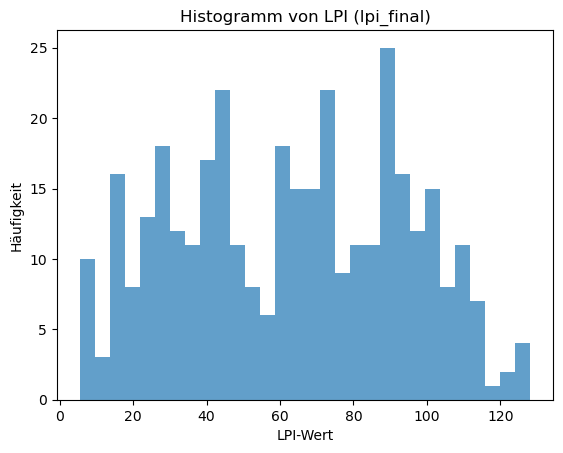

In [46]:
plt.hist(df['lpi_final'], bins=30, alpha=0.7)
plt.title('Histogramm von LPI (lpi_final)')
plt.xlabel('LPI-Wert')
plt.ylabel('Häufigkeit')
plt.show()

In [47]:
import seaborn as sns

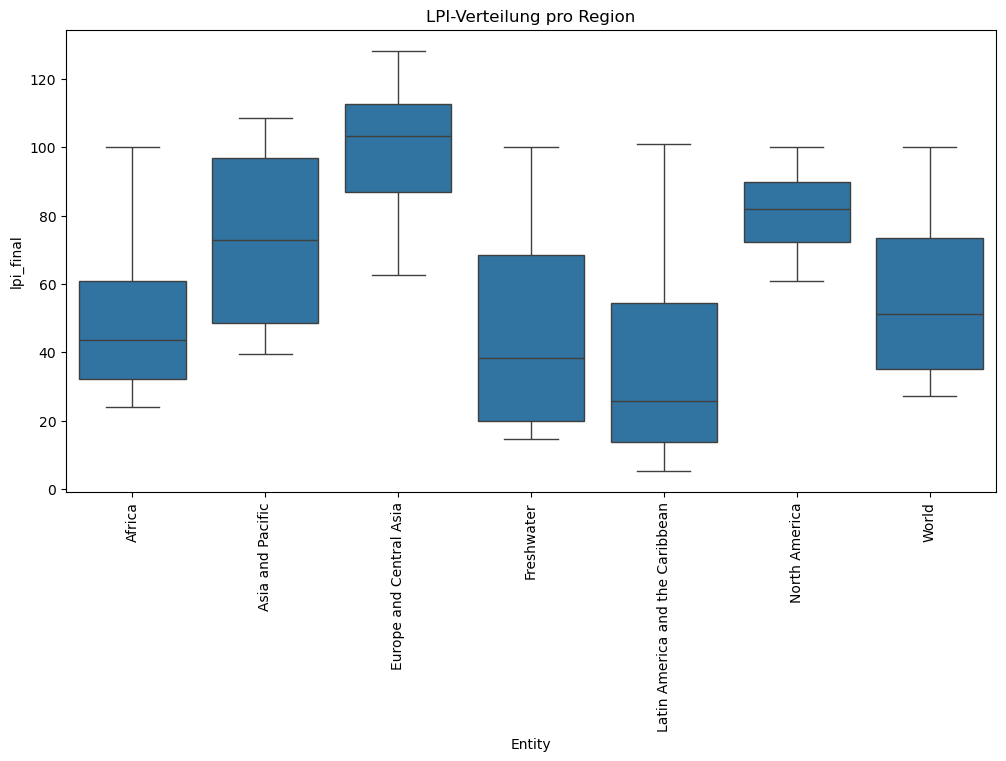

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Entity', y='lpi_final', data=df)
plt.xticks(rotation=90)
plt.title('LPI-Verteilung pro Region')
plt.show()

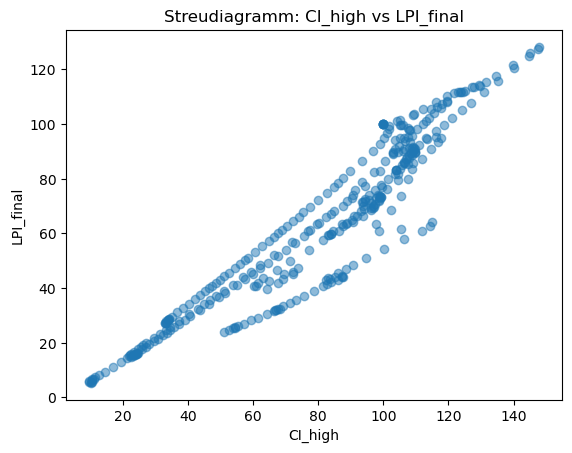

In [49]:
plt.scatter(df['ci_high'], df['lpi_final'], alpha=0.5)
plt.title('Streudiagramm: CI_high vs LPI_final')
plt.xlabel('CI_high')
plt.ylabel('LPI_final')
plt.show()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [54]:
avg_lpi = df.groupby(['Entity', 'Year'])['lpi_final'].mean().reset_index()
print(avg_lpi.head())

   Entity  Year   lpi_final
0  Africa  1970  100.000000
1  Africa  1971   94.004613
2  Africa  1972   89.996994
3  Africa  1973   89.674807
4  Africa  1974   85.613140


In [55]:
import matplotlib.pyplot as plt

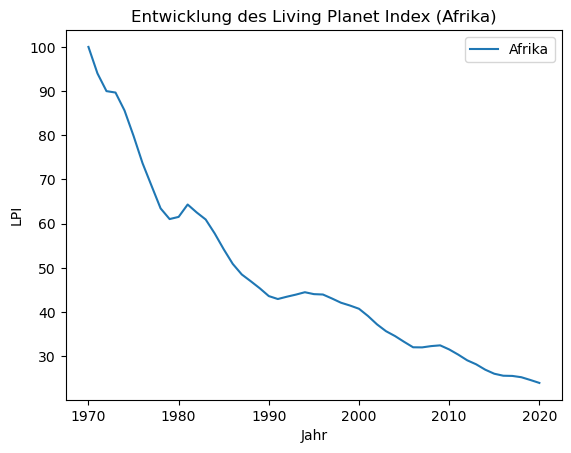

In [56]:
africa_data = df[df['Entity'] == 'Africa']
plt.plot(africa_data['Year'], africa_data['lpi_final'], label='Afrika')
plt.title('Entwicklung des Living Planet Index (Afrika)')
plt.xlabel('Jahr')
plt.ylabel('LPI')
plt.legend()
plt.show()

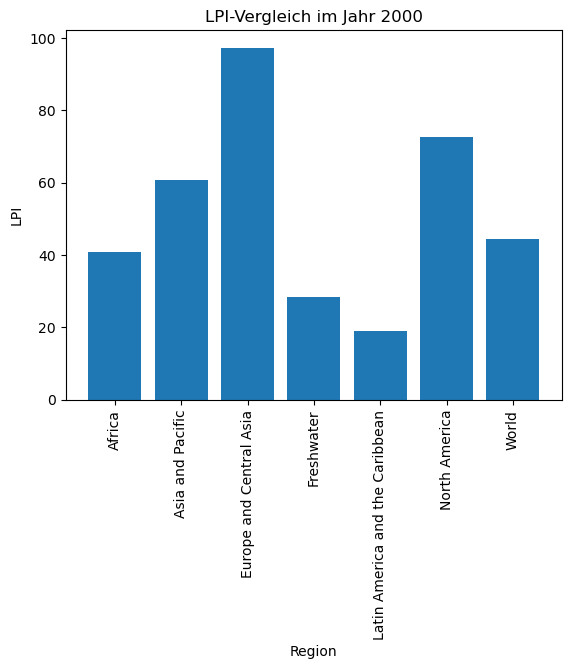

In [57]:
year_data = df[df['Year'] == 2000]
plt.bar(year_data['Entity'], year_data['lpi_final'])
plt.title('LPI-Vergleich im Jahr 2000')
plt.xlabel('Region')
plt.ylabel('LPI')
plt.xticks(rotation=90)
plt.show()

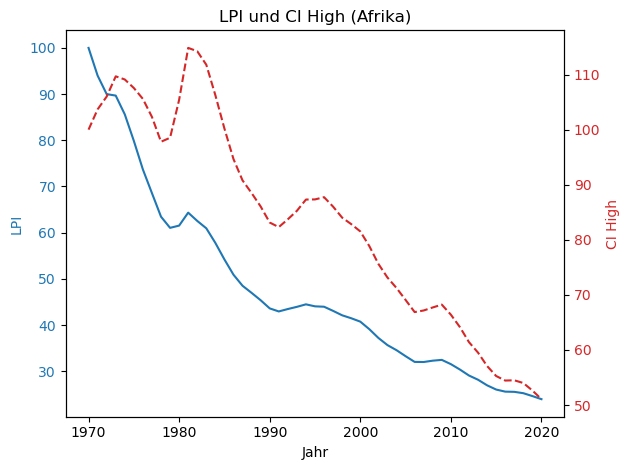

In [58]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Jahr')
ax1.set_ylabel('LPI', color='tab:blue')
ax1.plot(africa_data['Year'], africa_data['lpi_final'], color='tab:blue', label='LPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('CI High', color='tab:red')
ax2.plot(africa_data['Year'], africa_data['ci_high'], color='tab:red', linestyle='--', label='CI High')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('LPI und CI High (Afrika)')
fig.tight_layout()
plt.show()

Beobachten Sie die Trends und Muster in den Diagrammen:
Steigt oder fällt der LPI in bestimmten Regionen?
Gibt es signifikante Unterschiede zwischen den Regionen oder Jahren?
Wie groß sind die Unsicherheitsbereiche (ci_high, ci_low)?

Erstellen Sie Hypothesen, z. B.:
Regionen mit größerer wirtschaftlicher Entwicklung zeigen eine stabilere LPI-Entwicklung.
Der Rückgang in bestimmten Jahren könnte auf bestimmte Ereignisse (z. B. Umweltkatastrophen) hindeuten.

Hinweise zu möglichen Zusammenhängen:
Analysieren Sie Umweltberichte oder Forschung, um Trends zu erklären.
Nutzen Sie Quellen wie Our World in Data, die zu Ihrem Thema passen.